In [51]:
#pip install scikit-learn

In [52]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# importing Dataset

In [53]:
df = pd.read_csv(r"C:\Users\Bhalchandra\Desktop\Prediction_Disease_Outbreak\Dataset\diabetes.csv")

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
df.shape

(768, 9)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### finding duplicated Value

In [58]:
df.duplicated().sum()

0

In [59]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [60]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [61]:
correlation = df.corr()

<Axes: >

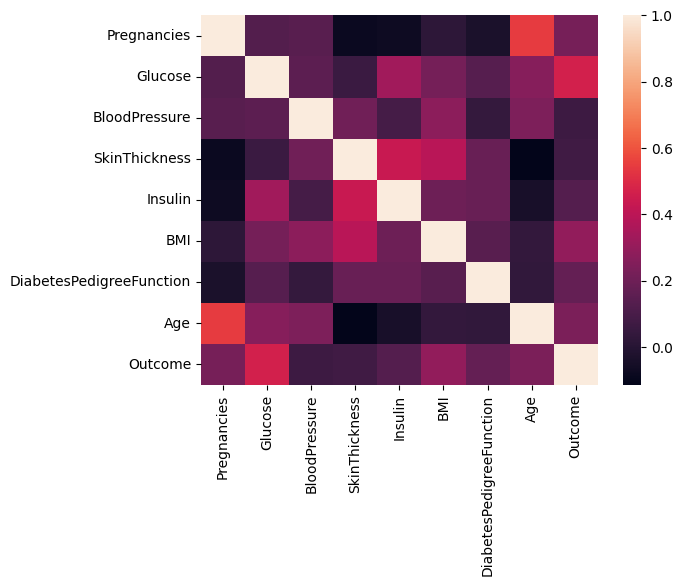

In [62]:
sns.heatmap(correlation)

In [63]:
columns = [
    'Pregnancies', 'SkinThickness', 'Glucose',
    'BloodPressure', 'Insulin', 'BMI',
    'DiabetesPedigreeFunction', 'Age'
]
for i in columns:
    print(i , "= ", df[i].skew())


Pregnancies =  0.9016739791518588
SkinThickness =  0.10937249648187608
Glucose =  0.17375350179188992
BloodPressure =  -1.8436079833551302
Insulin =  2.272250858431574
BMI =  -0.42898158845356543
DiabetesPedigreeFunction =  1.919911066307204
Age =  1.1295967011444805


##### columns[Age,DiabetesPedigreeFunction,Insulin,BloodPressure,Pregnancies] are skewed means it contain outliers

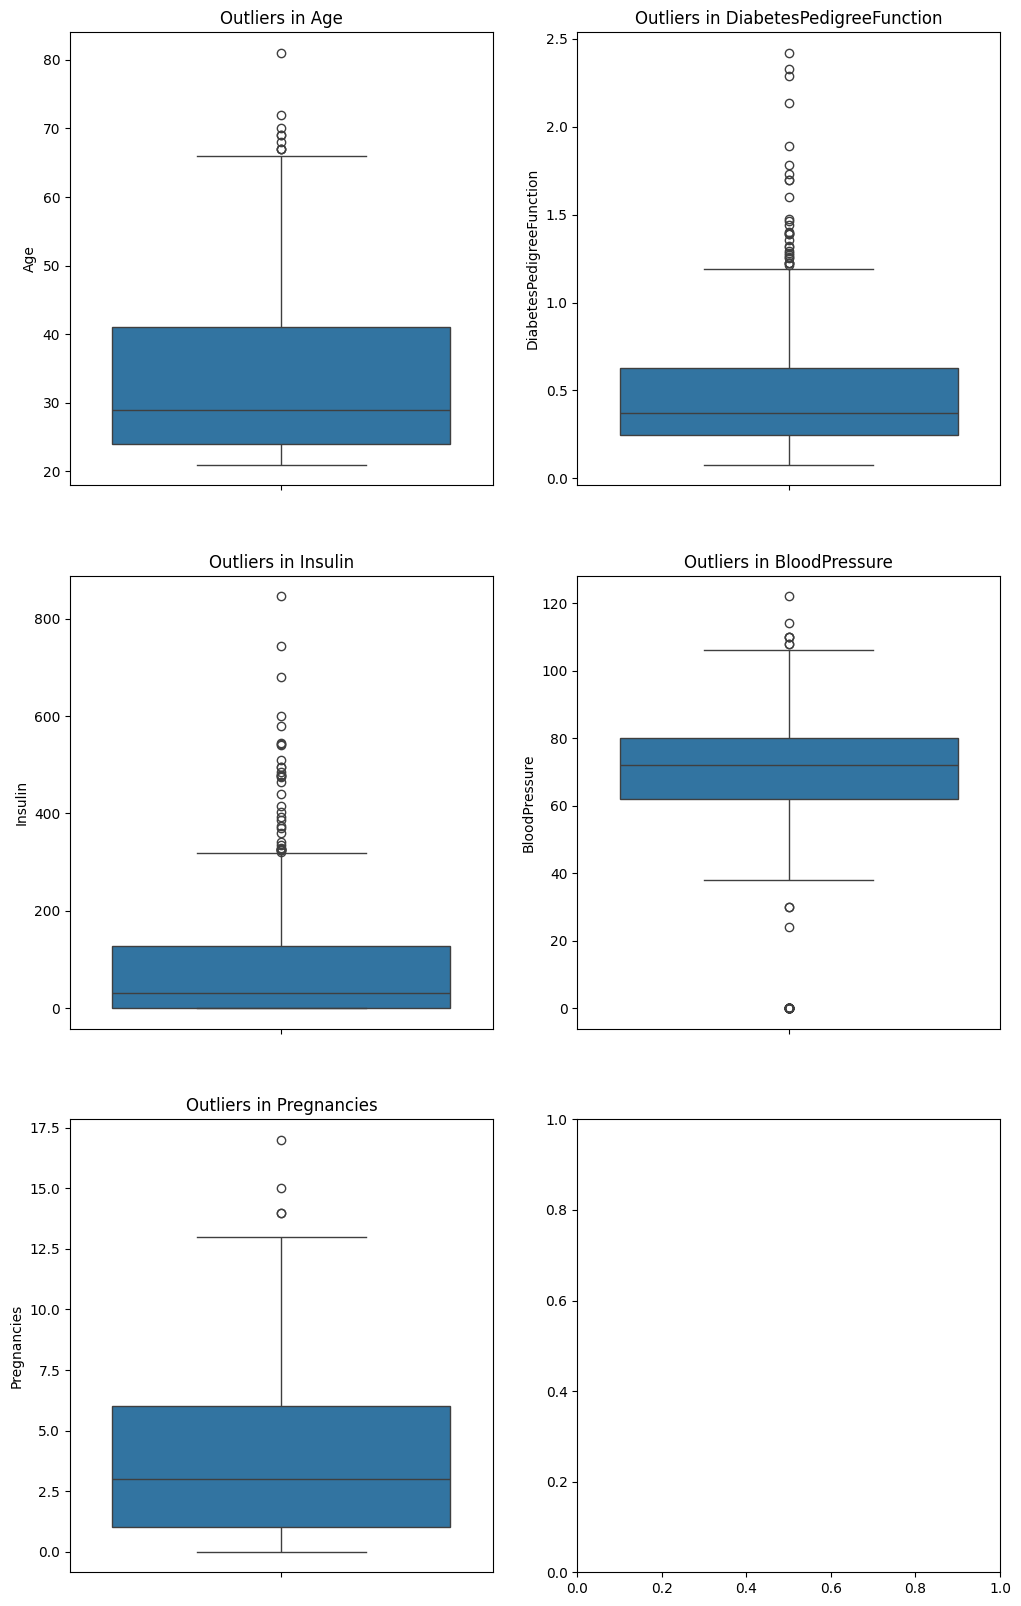

In [64]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))
axes = axes.flatten()  

columns = [
    'Age','DiabetesPedigreeFunction','Insulin','BloodPressure','Pregnancies'
]

# Iterate over columns and corresponding axes
for i, column in enumerate(columns):
    sns.boxplot(df[column], ax=axes[i])
    axes[i].set_title(f'Outliers in {column}')

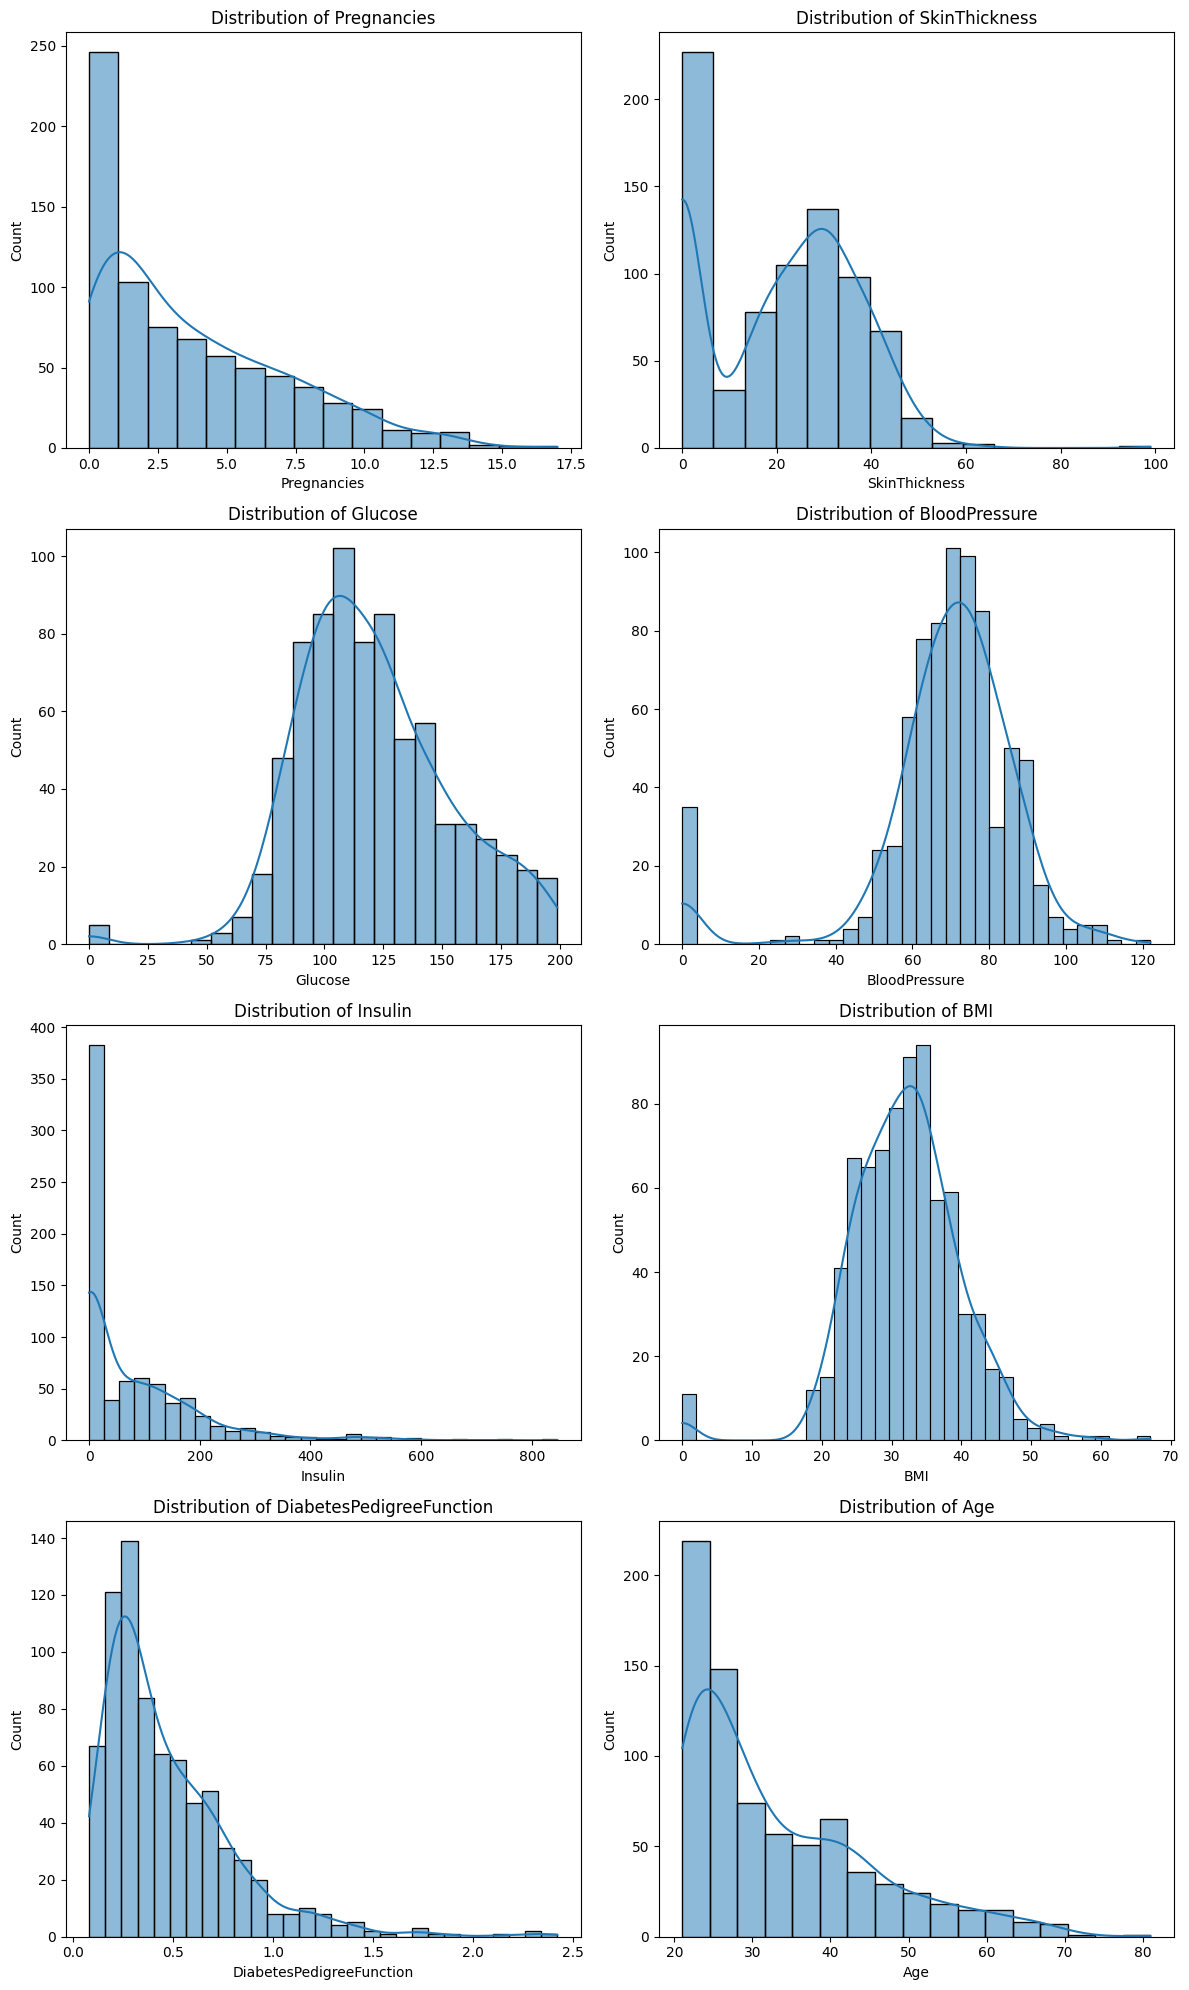

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 4 rows and 2 columns for subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 20))  # Adjust grid size for more columns
axes = axes.flatten()  # Flatten the 2D array into a 1D array for easier indexing

# List of columns to plot
columns = [
    'Pregnancies', 'SkinThickness', 'Glucose',
    'BloodPressure', 'Insulin', 'BMI',
    'DiabetesPedigreeFunction', 'Age'
]

# Iterate over columns and corresponding axes
for i, column in enumerate(columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Remove any unused subplots (if grid is larger than the number of columns)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [66]:
x = df.drop(columns=['Outcome'],axis=1)
y = df['Outcome']

In [67]:
x.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [68]:
y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [70]:

x_test.shape

(154, 8)

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### using SVC

In [72]:
model = SVC(kernel="linear")
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrisxs = confusion_matrix(y_test,y_pred)
print(confusion_matrisxs,accuracy_score(y_test,y_pred))


[[90  9]
 [20 35]] 0.8116883116883117


In [74]:
pip install pickle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(model, open(filename, 'wb'))